In [1]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces(data_home='data')
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

# Выведите информацию о количественных параметрах датасет

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# faces = fetch_olivetti_faces()
print("Keys:", faces.keys())
print("Total samples and image size:", faces.images.shape) #разница в разложении "квадратом" (т.е. это уже картинка)
print("Total samples and features:", faces.data.shape)
print("Total samples and targets:", faces.target.shape)

Keys: dict_keys(['data', 'images', 'target', 'DESCR'])
Total samples and image size: (400, 64, 64)
Total samples and features: (400, 4096)
Total samples and targets: (400,)


# Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;

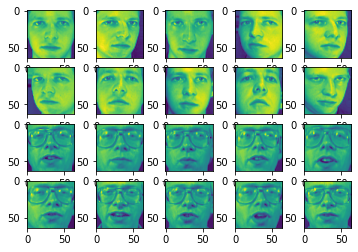

In [3]:
images = faces.images 

features = faces.data  # features
targets = faces.target # targets

fig = plt.figure() 
for i in range(20): 
    img_grid = fig.add_subplot(4, 5, i+1)
    img_grid.imshow(images[i])

plt.show()

# Разделите эти данные на тестовую и обучающую выборки;

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split

In [5]:
train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=22,
        stratify=targets
    )

In [43]:
test_targets

array([15,  5, 22, 11,  2, 32, 14,  6, 21, 29, 22, 19, 19, 17,  9, 12, 10,
        7, 33, 27, 29, 28, 13, 21, 23, 38, 30, 39, 37,  1,  3, 24, 23, 18,
       31, 14, 37, 18,  9,  8, 36, 17, 20,  0, 35, 25,  3, 33, 16, 32,  4,
       16, 26, 13,  0, 35, 20,  2, 39, 31, 11,  6, 12, 30, 26,  5, 27, 25,
       15,  1, 34, 28, 36, 34, 24,  7, 38, 10,  8,  4])

# Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;

In [17]:
classifier = SVC(kernel="linear") # default kernel=rbf
# training using 'training data'
classifier.fit(train_features, train_targets) # fit the model for training data

SVC(kernel='linear')

# Оцените качество модели на тестовой выборке с помощью следующих метрик:
достоверность предсказания (accuracy);
точность (precision);
полнота (recall);

In [20]:
from sklearn.metrics import classification_report

In [33]:
classification_report(test_targets, prediction_test_targets,output_dict=True)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '9': {'precision': 1.0,
  'recall': 0.5,
  'f1-score': 0.6666666666666666,
  'support': 2},
 '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '11': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '12': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '13': {'precision': 1.0, 'recall': 1.0,

In [17]:
# predict the 'target' for 'test data'
prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets,average='macro')
test_recall = recall_score(test_targets, prediction_test_targets,average='macro')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data:", test_accuracy)
print("Recall for test data:", test_accuracy)

Accuracy for test data: 0.9875
Precision for test data: 0.9875
Recall for test data: 0.9875


In [22]:
print(classification_report(targets, classifier.predict(features)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       0.91      1.00      0.95        10
          17       1.00    

# Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

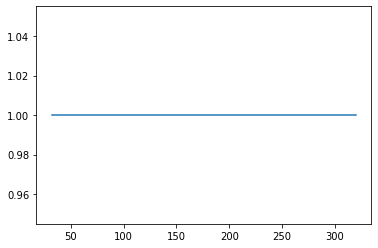

In [18]:
%matplotlib inline

from sklearn.model_selection import learning_curve
import numpy as np 

estimator = SVC(gamma=0.001)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(classifier, features, targets,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

In [19]:
train_scores

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

# Сделайте вывод о применимости модели.

In [ ]:
Модель применима, качество хорошее!